In [88]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
from sklearn.preprocessing import LabelEncoder


# akuisisi data, preproses, dan fitur

In [90]:
minmax = MinMaxScaler()
sm = SMOTE(random_state=30)
le = LabelEncoder()

hrv_smote_accuracy_ = []
rmsdd_smote_accuracy_ = []
sdnn_smote_accuracy_ = []
total_smote_accuracy_ = []
x_y_totall = []

label = os.listdir()
for i in range(0,len(label)-1):
    data = pd.read_excel(label[i])
    x_hrv = data[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    x_rmsdd = data[['BPM','RMSSD','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    x_sdnn = data[['BPM','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    x_total = data[['BPM','HRV','RMSSD','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
    y_klasifikasi = data['KECEMASAN']

    y_klasifikasi_le = le.fit(y_klasifikasi)
    y_klasifikasi_le = y_klasifikasi_le.transform(y_klasifikasi)
    y_klasifikasi_le = pd.DataFrame(y_klasifikasi_le)

    x_hrv = minmax.fit_transform(x_hrv)
    x_rmsdd = minmax.fit_transform(x_rmsdd)
    x_sdnn = minmax.fit_transform(x_sdnn)
    x_total = minmax.fit_transform(x_total)

    df_x_total = pd.DataFrame(x_total)
    x_y_total = pd.concat([df_x_total,y_klasifikasi_le],axis=1)
    x_y_totall.append(x_y_total)

    x_hrv_smote,y_hrv_smote = sm.fit_resample(x_hrv,y_klasifikasi)
    x_rmsdd_smote,y_rmsdd_smote = sm.fit_resample(x_rmsdd,y_klasifikasi)
    x_sdnn_smote,y_sdnn_smote = sm.fit_resample(x_sdnn,y_klasifikasi)
    x_total_smote,y_total_smote = sm.fit_resample(x_total,y_klasifikasi)

    x_hrv_smote_train, x_hrv_smote_test, y_hrv_smote_train, y_hrv_smote_test = train_test_split(x_hrv_smote, y_hrv_smote, test_size= 0.2, random_state=20)
    x_rmsdd_smote_train, x_rmsdd_smote_test, y_rmsdd_smote_train, y_rmsdd_smote_test = train_test_split(x_rmsdd_smote, y_rmsdd_smote, test_size= 0.2, random_state=20)
    x_sdnn_smote_train, x_sdnn_smote_test, y_sdnn_smote_train, y_sdnn_smote_test = train_test_split(x_sdnn_smote, y_sdnn_smote, test_size= 0.2, random_state=20)
    x_total_smote_train, x_total_smote_test, y_total_smote_train, y_total_smote_test = train_test_split(x_total_smote, y_total_smote, test_size= 0.2, random_state=20)


    hrv_smote_accuracy = []
    rmsdd_smote_accuracy = []
    sdnn_smote_accuracy = []
    total_smote_accuracy = []
    hrv_smote_accuracy_.append(hrv_smote_accuracy)
    rmsdd_smote_accuracy_.append(rmsdd_smote_accuracy)
    sdnn_smote_accuracy_.append(sdnn_smote_accuracy)
    total_smote_accuracy_.append(total_smote_accuracy)
    

    for i in range(1,51):
        k = i
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_hrv_smote_train,y_hrv_smote_train)
        hrv_smote_accuracy.append(model.score(x_hrv_smote_test, y_hrv_smote_test))
        model.fit(x_rmsdd_smote_train,y_rmsdd_smote_train)
        rmsdd_smote_accuracy.append(model.score(x_rmsdd_smote_test, y_rmsdd_smote_test))
        model.fit(x_sdnn_smote_train,y_sdnn_smote_train)
        sdnn_smote_accuracy.append(model.score(x_sdnn_smote_test, y_sdnn_smote_test))
        model.fit(x_total_smote_train,y_total_smote_train)
        total_smote_accuracy.append(model.score(x_total_smote_test, y_total_smote_test))




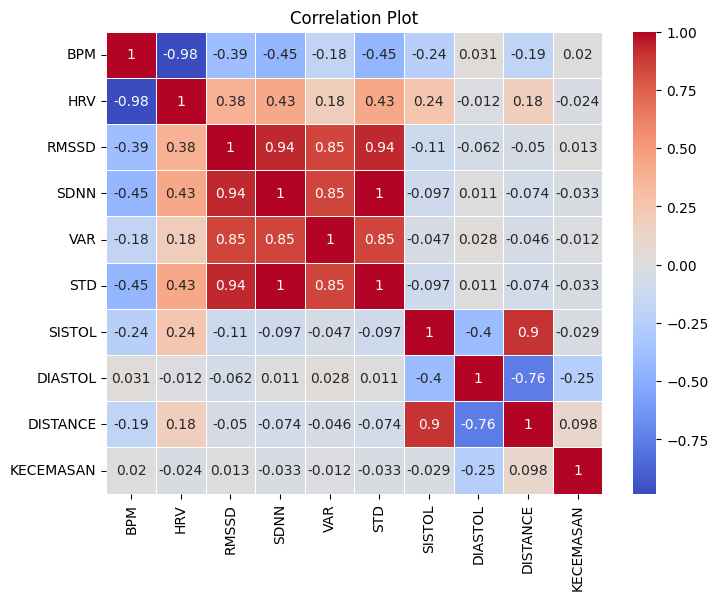

In [100]:
x_y_totall[2].columns = ['BPM','HRV','RMSSD','SDNN','VAR','STD','SISTOL','DIASTOL','DISTANCE', 'KECEMASAN']
x_y_totall2_corr = x_y_totall[2].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(x_y_totall2_corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot')
plt.show()

In [101]:
hrv_smote_accuracy_0 = pd.DataFrame(hrv_smote_accuracy_[0])
hrv_smote_accuracy_1 = pd.DataFrame(hrv_smote_accuracy_[1])
hrv_smote_accuracy_2 = pd.DataFrame(hrv_smote_accuracy_[2])
rmsdd_smote_accuracy_0 = pd.DataFrame(rmsdd_smote_accuracy_[0])
rmsdd_smote_accuracy_1 = pd.DataFrame(rmsdd_smote_accuracy_[1])
rmsdd_smote_accuracy_2 = pd.DataFrame(rmsdd_smote_accuracy_[2])
sdnn_smote_accuracy_0 = pd.DataFrame(sdnn_smote_accuracy_[0])
sdnn_smote_accuracy_1 = pd.DataFrame(sdnn_smote_accuracy_[1])
sdnn_smote_accuracy_2 = pd.DataFrame(sdnn_smote_accuracy_[2])
total_smote_accuracy_0 = pd.DataFrame(total_smote_accuracy_[0])
total_smote_accuracy_1 = pd.DataFrame(total_smote_accuracy_[1])
total_smote_accuracy_2 = pd.DataFrame(total_smote_accuracy_[2])

# hrv_smote_accuracy_0
print(f'hrv_smote_accuracy_0 \n{hrv_smote_accuracy_0[0].nlargest(5)}')
print(f'hrv_smote_accuracy_1 \n{hrv_smote_accuracy_1[0].nlargest(5)}')
print(f'hrv_smote_accuracy_2 \n{hrv_smote_accuracy_2[0].nlargest(5)}')
print(f'rmsdd_smote_accuracy_0 \n{rmsdd_smote_accuracy_0[0].nlargest(5)}')
print(f'rmsdd_smote_accuracy_1 \n{rmsdd_smote_accuracy_1[0].nlargest(5)}')
print(f'rmsdd_smote_accuracy_2 \n{rmsdd_smote_accuracy_2[0].nlargest(5)}')
print(f'sdnn_smote_accuracy_0 \n{sdnn_smote_accuracy_0[0].nlargest(5)}')
print(f'sdnn_smote_accuracy_1 \n{sdnn_smote_accuracy_1[0].nlargest(5)}')
print(f'sdnn_smote_accuracy_2 \n{sdnn_smote_accuracy_2[0].nlargest(5)}')
print(f'total_smote_accuracy_0 \n{total_smote_accuracy_0[0].nlargest(5)}')
print(f'total_smote_accuracy_1 \n{total_smote_accuracy_1[0].nlargest(5)}')
print(f'total_smote_accuracy_2 \n{total_smote_accuracy_2[0].nlargest(5)}')

hrv_smote_accuracy_0 
0    0.788889
4    0.733333
5    0.733333
6    0.733333
1    0.722222
Name: 0, dtype: float64
hrv_smote_accuracy_1 
0    0.790123
3    0.740741
2    0.716049
1    0.691358
4    0.691358
Name: 0, dtype: float64
hrv_smote_accuracy_2 
0    0.844444
1    0.788889
2    0.788889
4    0.755556
3    0.744444
Name: 0, dtype: float64
rmsdd_smote_accuracy_0 
0    0.755556
2    0.744444
3    0.733333
1    0.722222
5    0.722222
Name: 0, dtype: float64
rmsdd_smote_accuracy_1 
0    0.802469
2    0.740741
3    0.728395
4    0.691358
1    0.679012
Name: 0, dtype: float64
rmsdd_smote_accuracy_2 
0    0.877778
2    0.766667
1    0.755556
3    0.744444
4    0.744444
Name: 0, dtype: float64
sdnn_smote_accuracy_0 
0    0.777778
2    0.744444
5    0.733333
4    0.722222
6    0.722222
Name: 0, dtype: float64
sdnn_smote_accuracy_1 
0    0.777778
3    0.753086
2    0.728395
1    0.691358
4    0.679012
Name: 0, dtype: float64
sdnn_smote_accuracy_2 
0    0.844444
2    0.777778
1    0.755556